### Visualization of electricity consumption with focus on night time

In [1]:
import os
import sys
import time
import inspect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from opengrid import config
from opengrid.library import plotting
from opengrid.library import houseprint

c=config.Config()

try:
    if os.path.exists(c.get('tmpo', 'data')):
        path_to_tmpo_data = c.get('tmpo', 'data')
except:
    path_to_tmpo_data = None
    
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

# path to data
path_to_data = c.get('data', 'folder')
if not os.path.exists(path_to_data):
    raise IOError("Provide your path to the data in your config.ini file.  This is a folder containing a 'zip' and 'csv' subfolder.")
else:
    path_to_fig = os.path.join(path_to_data, 'figures')
    if not os.path.isdir(path_to_fig): os.makedirs(path_to_fig)

In [2]:
houseprint.__file__

'/usr/local/opengrid/opengrid/library/houseprint/__init__.pyc'

In [3]:
hp = houseprint.Houseprint()
hp.init_tmpo(path_to_tmpo_data=path_to_tmpo_data)

#set start date
number_of_days = 60
start = pd.Timestamp(time.time() - number_of_days*86400, unit='s')

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
24 Sites created
24 Devices created
75 sensors created
Houseprint parsing complete
Using tmpo database from /data/.tmpo/tmpo.sqlite3


In [4]:
sensor = hp.get_sensors(sensortype='electricity')[0]
df = sensor.get_data(head = start)
df = df.diff()*60 #from Wh/min to W

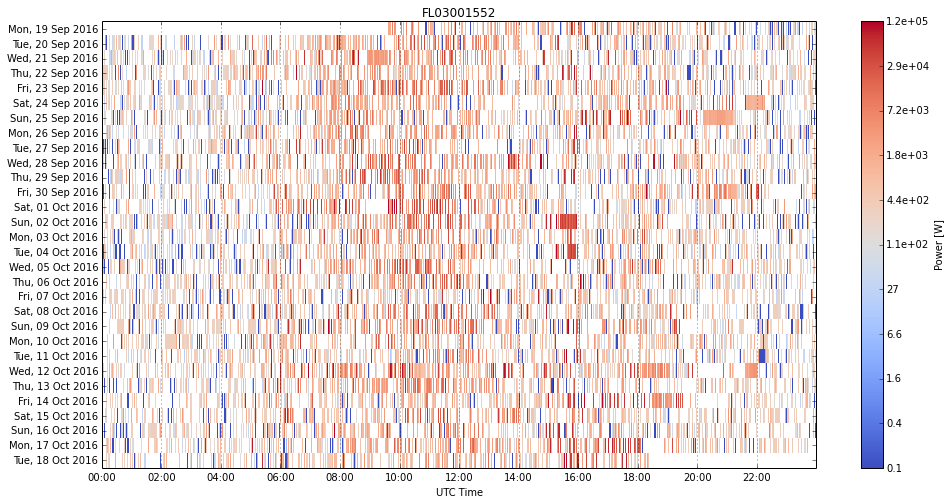

In [5]:
plotting.carpet(df, title=sensor.device.key, zlabel=r'Power [W]')

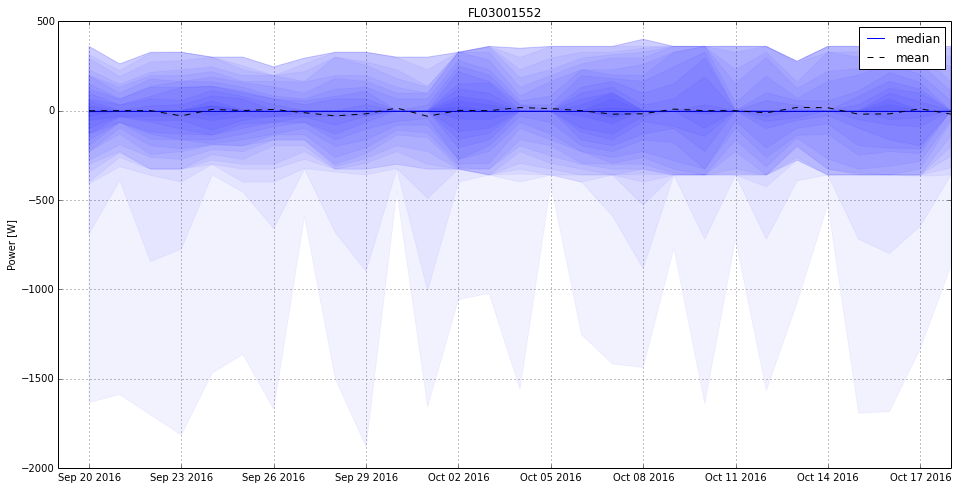

In [6]:
plotting.fanchart(df, title=sensor.device.key, ylabel=r'Power [W]', start_hour=0, end_hour=3)

In [7]:
begin = pd.Timestamp('20150701')
end = begin + pd.Timedelta('1 day')
df.truncate(begin,end).plot(title=sensor.device.key)
plt.xlabel(begin)

TypeError: Empty 'DataFrame': no numeric data to plot